In [5]:
! pip install stopwordsiso
! pip install langdetect
! pip install simplemma
! pip install swifter
! pip install preprocessor
! pip install seaborn

You should consider upgrading via the 'C:\应用\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\应用\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\应用\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\应用\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\应用\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\应用\Python\python.exe -m pip install --upgrade pip' command.


In [6]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import html
import json
import pandas as pd
import numpy as np
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
import pandas as pd
#for text pre-processing
import re,string

In [8]:
# Load Data

df= pd.read_excel('Data/training_data.xlsx')
df.head()

hashtags                                          full_text  \
0  feminist AskMeAnything  b'RT @swedennewyork: What does it mean to have...   
1                     NaN  b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...   
2                     NaN  b'@Panenka_Bart Veel beterschap Bart en Loes! ...   
3                     NaN  b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...   
4                     NaN        b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm'   

  in_reply_to_screen_name country_user gender_user pol_spec_user  
0                     NaN       sweden        Male          Left  
1                     NaN       norway        Male          Left  
2             BartDerwael      belgium        Male          Left  
3                     NaN      denmark      Female          Left  
4                     NaN       sweden        Male          Left

# EDA

## a) Create a table that contains information on minimum, average, median, and maximum for the following: tweet length (#characters and #words) (text column), hashtag length (#characters and #words) (hashtags column) (Add your table to the report.)

In [9]:
# Fill NaN values with empty string
import numpy as np
import matplotlib.pyplot as plt
import random
df['hashtags'].fillna('', inplace=True)
df['full_text'].fillna('', inplace=True)

In [10]:
df['word_count_ft'] = df['full_text'].apply(lambda x: len(str(x).split()))
df['char_count_ft'] = df['full_text'].apply(lambda x: len(str(x)))
df['word_count_ht'] = df['hashtags'].apply(lambda x: len(str(x).split()))
df['char_count_ht'] = df['hashtags'].apply(lambda x: len(str(x)))
Minimum_wcft = df['word_count_ft'].min()
Average_wcft = df['word_count_ft'].mean()
Median_wcft = df['word_count_ft'].median()
Maximum_wcft = df['word_count_ft'].max()
Minimum_ccft = df['char_count_ft'].min()
Average_ccft = df['char_count_ft'].mean()
Median_ccft = df['char_count_ft'].median()
Maximum_ccft = df['char_count_ft'].max()

Minimum_wcht = df['word_count_ht'].min()
Average_wcht = df['word_count_ht'].mean()
Median_wcht = df['word_count_ht'].median()
Maximum_wcht = df['word_count_ht'].max()
Minimum_ccht = df['char_count_ht'].min()
Average_ccht = df['char_count_ht'].mean()
Median_ccht = df['char_count_ht'].median()
Maximum_ccht = df['char_count_ht'].max()
data = {
    'word_count_fulltext': [Median_wcft, Average_wcft, Minimum_wcft, Maximum_wcft],
    'char_count_fulltext': [Median_ccft, Average_ccft, Minimum_ccft, Maximum_ccft],
    'word_count_hashtag': [Median_wcht, Average_wcht, Minimum_wcht, Maximum_wcht],
    'char_count_hashtag': [Median_ccht, Average_ccht, Minimum_ccht, Maximum_ccht]
}
df_statistics = pd.DataFrame(data, index=['median', 'mean', 'min', 'max'])
df_statistics = df_statistics.transpose()
df_statistics.columns.name = None
df_statistics

median        mean  min     max
word_count_fulltext    19.0   20.141102  1.0    89.0
char_count_fulltext   156.0  167.304121  4.0  2994.0
word_count_hashtag      0.0    0.492197  0.0    16.0
char_count_hashtag      0.0    4.395594  0.0   145.0

## b) Find the top ten most commonly used hashtags (hashtags column) in each country separately. Then, create pie charts (one pie chart per country) which show the distribution of these ten most commonly used hashtags for each country. 

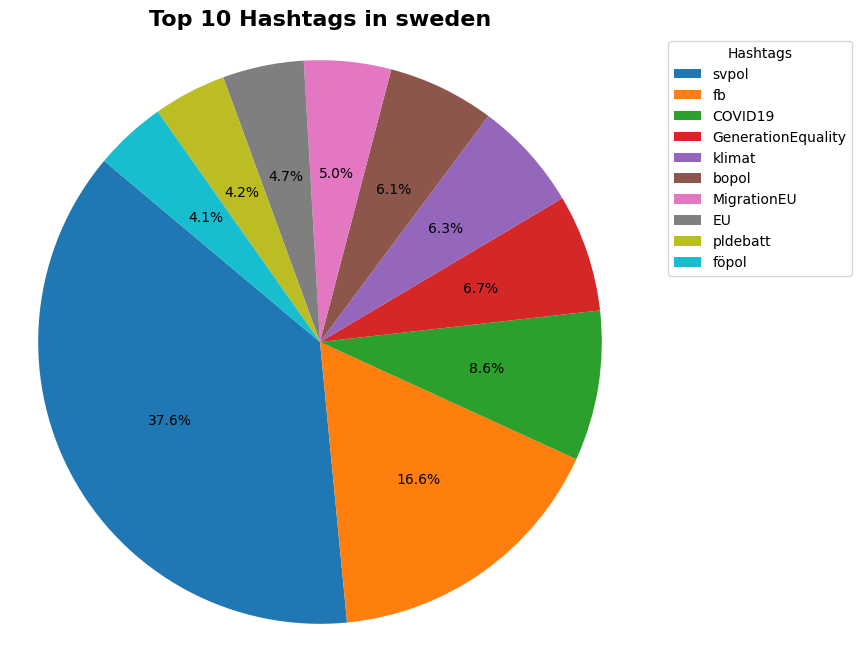

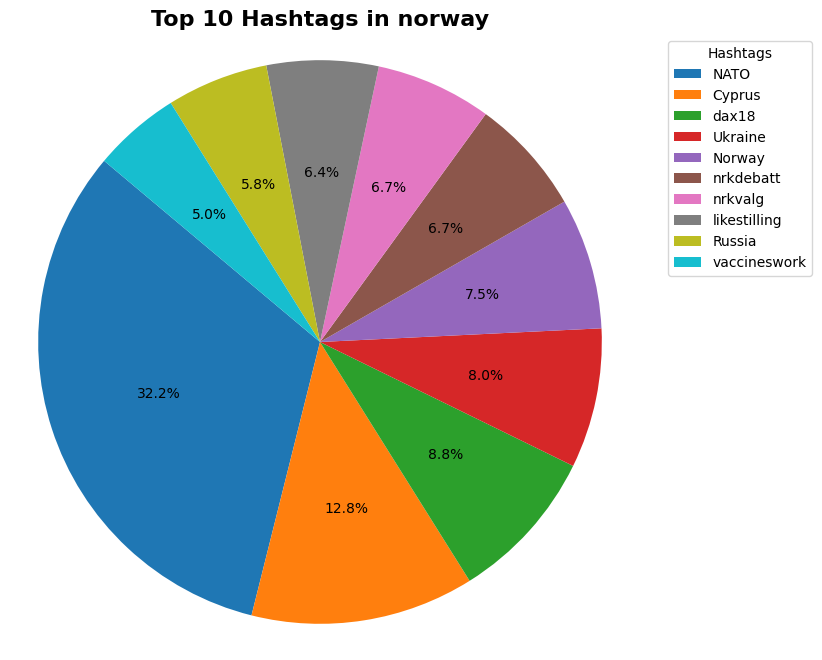

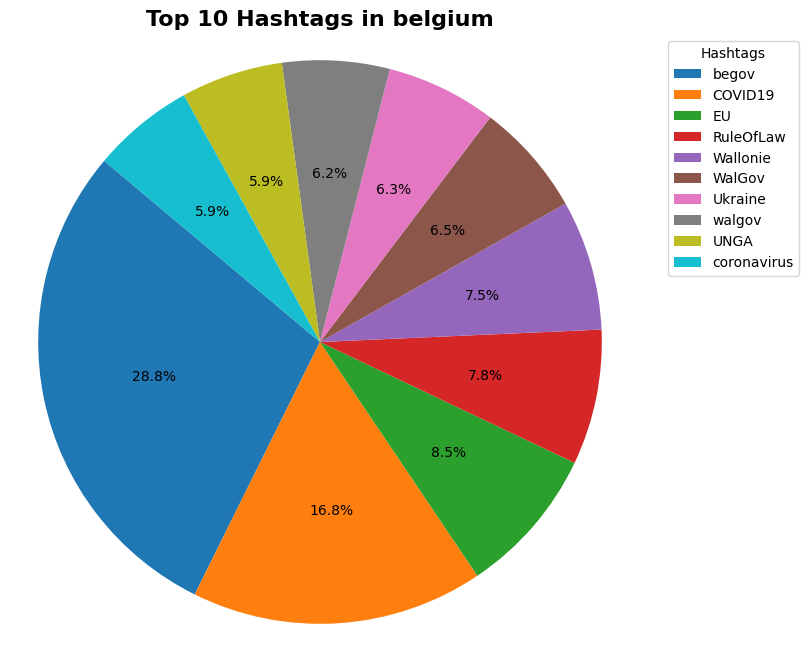

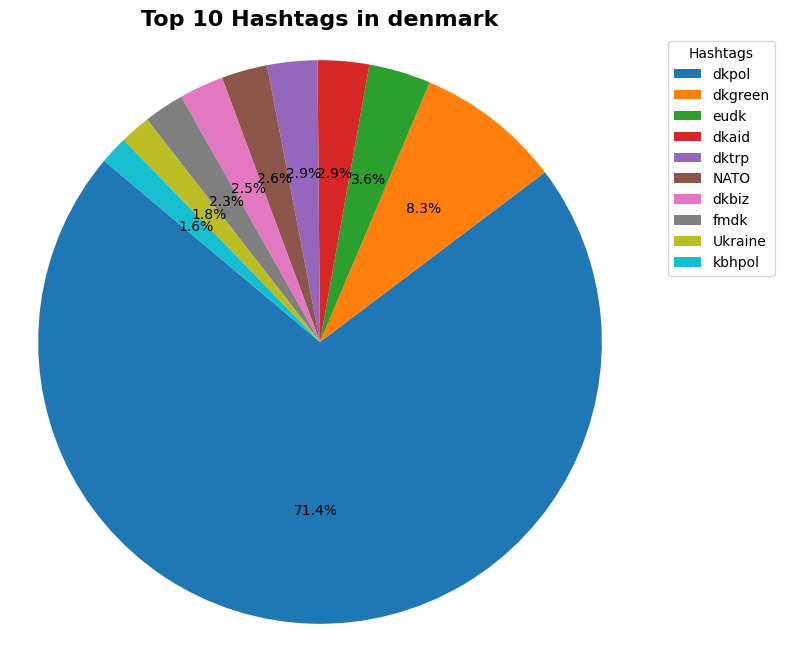

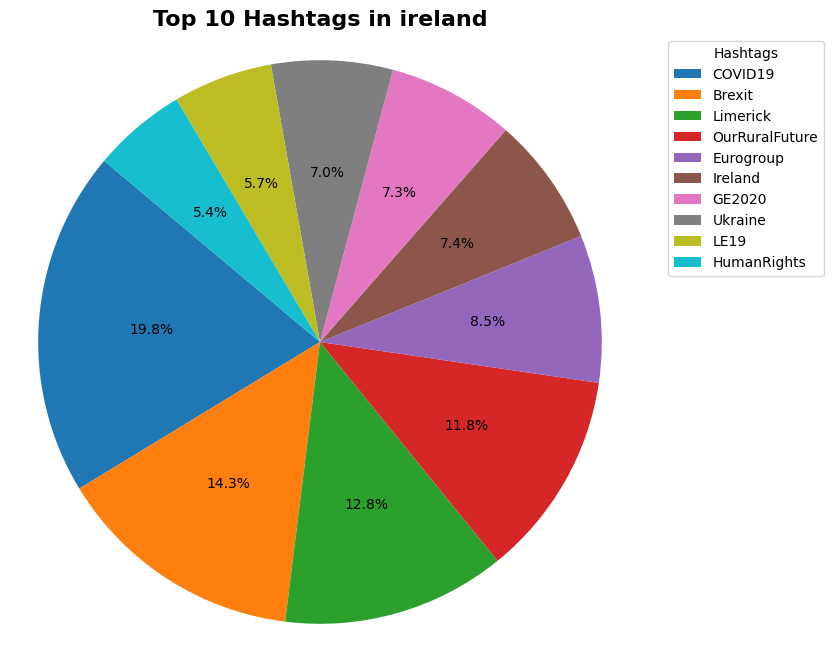

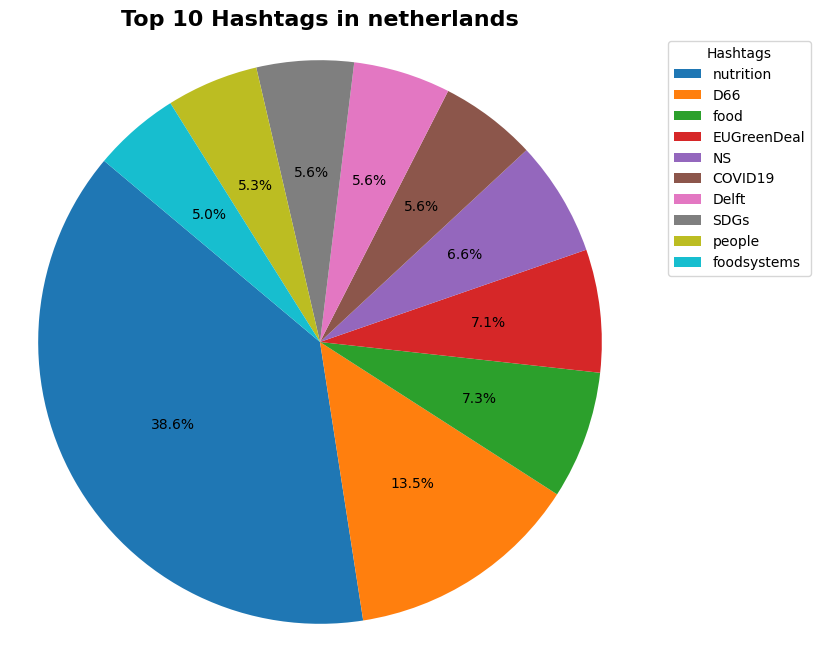

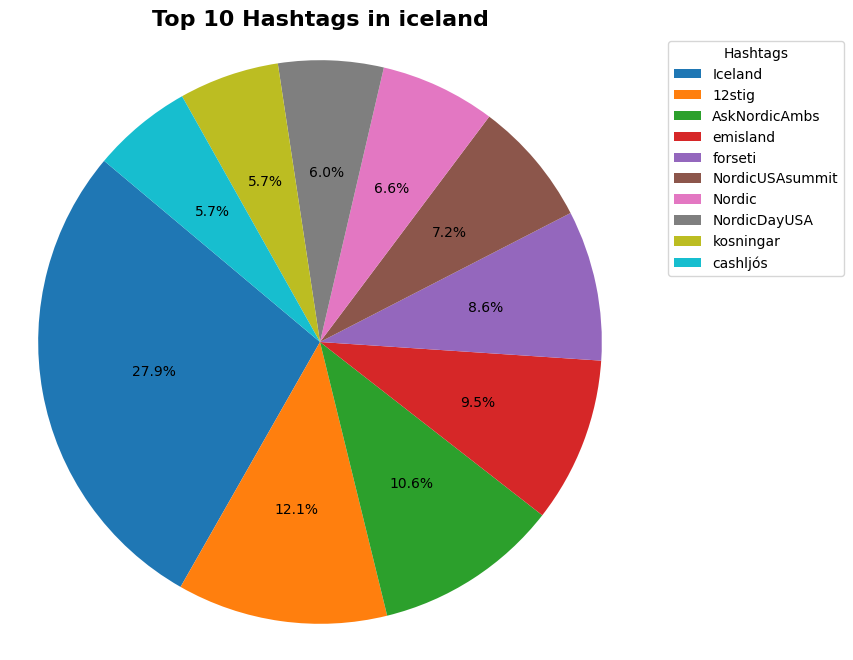

In [11]:
df['hashtags_list'] = df['hashtags'].str.split()
df['hashtags_list'] = df['hashtags_list'].apply(lambda x: [] if isinstance(x, float) else x)
top_hashtags_by_country = {}
unique_countries = df['country_user'].unique()

for country in unique_countries:
    country_df = df[df['country_user'] == country]
    hashtags = [tag for sublist in country_df['hashtags_list'].tolist() for tag in sublist]
    hashtag_counts = pd.Series(hashtags).value_counts()
    top_hashtags = hashtag_counts.head(10)
    top_hashtags_by_country[country] = top_hashtags
title_fontsize = 16
title_fontweight = 'bold'

for country, top_hashtags in top_hashtags_by_country.items():
    plt.figure(figsize=(8, 8))
    colors = [plt.cm.Paired(random.choice(range(12))) for _ in range(len(top_hashtags))]

    pie_chart = plt.pie(top_hashtags, labels=None, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 10 Hashtags in {country}', fontsize=title_fontsize, fontweight=title_fontweight)

    plt.axis('equal')

    legend_text = [f'{hashtag}' for hashtag in top_hashtags.index]
    plt.legend(legend_text, title='Hashtags', loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.show()

## c) Create a stacked bar chart (one stacked bar per country) that shows the percentage of political views associated with each country. [Create normalized bars to show percentages: minimum should be 0, maximum should be 1 (or 0% and 100%)].

<Figure size 1200x600 with 0 Axes>

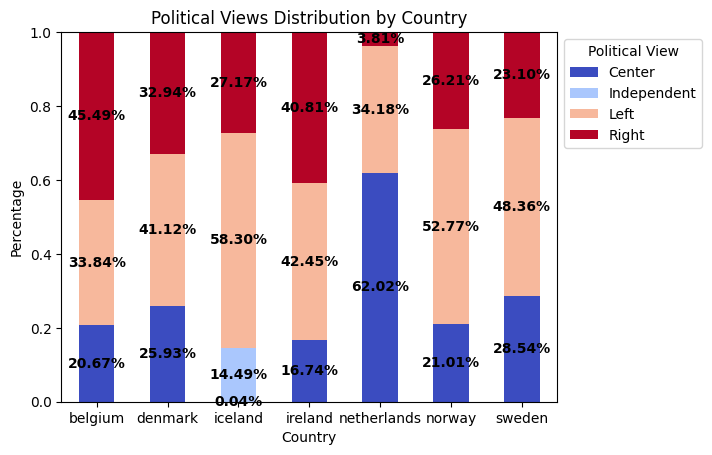

In [12]:
grouped_ps = df.groupby(['country_user', 'pol_spec_user']).size().unstack().fillna(0)
grouped_percentage = grouped_ps.div(grouped_ps.sum(axis=1), axis=0)
countries = grouped_percentage.index

plt.figure(figsize=(12, 6))
ax = grouped_percentage.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Political Views Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.ylim(0, 1)
plt.xticks(range(len(countries)), countries, rotation=0)

for i, row in enumerate(grouped_percentage.values):
    total = sum(row)
    for j, val in enumerate(row):
        if val != 0:
            plt.text(i, sum(row[:j+1]) - val / 2, f'{val / total:.2%}', ha='center', va='center', fontsize=10, fontweight='bold')

plt.legend(title='Political View', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## d) Create a stacked bar chart that shows the distribution of genders by country. [Create normalized bars to show percentages: minimum should be 0, maximum should be 1 (or 0% and 100%)].

<Figure size 1200x600 with 0 Axes>

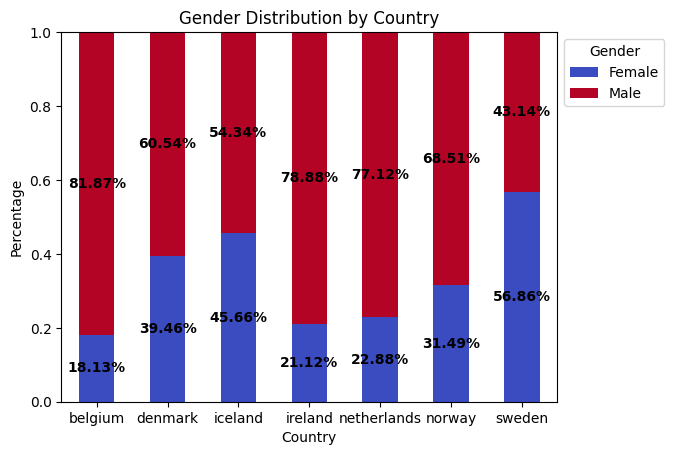

In [13]:
grouped_g = df.groupby(['country_user', 'gender_user']).size().unstack().fillna(0)
grouped_percentage = grouped_g.div(grouped_g.sum(axis=1), axis=0)

countries = grouped_percentage.index

plt.figure(figsize=(12, 6))
ax = grouped_percentage.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.ylim(0, 1)
plt.xticks(range(len(countries)), countries, rotation=0)

for i, row in enumerate(grouped_percentage.values):
    total = sum(row)
    for j, val in enumerate(row):
        if val != 0:
            plt.text(i, sum(row[:j+1]) - val / 2, f'{val / total:.2%}', ha='center', va='center', fontsize=10, fontweight='bold')

plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# **Train**

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# stopwords
english_stopwords = set(stopwords.words('english'))
danish_stopwords = set(stopwords.words('danish'))
norwegian_stopwords = set(stopwords.words('norwegian'))
swedish_stopwords = set(stopwords.words('swedish'))

# combine all stopwords
all_stopwords = english_stopwords.union(danish_stopwords, norwegian_stopwords, swedish_stopwords)
all_stopwords = all_stopwords.union({'rt', 'via', 'amp'})

def preprocess(text):
    # lowercase
    text = text.lower()
    # strip 
    text=text.strip()
    # remove html tags
    text=re.compile('<.*?>').sub('', text)
    # remove URL
    text = re.sub(r'http\S+', '', text)
    # remove emoji
    text = re.sub(r'\\x\S+', '', text)
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    # remove numbers
    text = re.sub(r'\[[0-9]*\]',' ',text)
    # remove all except word and space
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # remove whitespaces
    text = re.sub(r'\s+',' ',text)
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in all_stopwords and len(word)>2])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#LEMMATIZATION
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\叶濮华\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# apply the pre-processing

df['TextClean'] = df['full_text'].apply(preprocess)
df['TextClean'] = df['TextClean'].apply(lemmatizer)

In [17]:
# encode the target variable

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['pol_spec_user'] = encoder.fit_transform(df["pol_spec_user"])
df.head()

hashtags                                          full_text  \
0  feminist AskMeAnything  b'RT @swedennewyork: What does it mean to have...   
1                          b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...   
2                          b'@Panenka_Bart Veel beterschap Bart en Loes! ...   
3                          b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...   
4                                b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm'   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  \
0                     NaN       sweden        Male              2   
1                     NaN       norway        Male              2   
2             BartDerwael      belgium        Male              2   
3                     NaN      denmark      Female              2   
4                     NaN       sweden        Male              2   

   word_count_ft  char_count_ft  word_count_ht  char_count_ht  \
0             25            154              2             22   
1             13            107              0              0   
2              7             63              0              0   
3             15            179              0              0   
4              2             43              0              0   

               hashtags_list  \
0  [feminist, AskMeAnything]   
1                         []   
2                         []   
3                         []   
4                         []   

                                           TextClean  
0  swedennewyork mean feminist government join re...  
1  jens stoltenberg virtuelle rockheim dag sjekk ogs  
2             panenka bart veel beterschap bart loes  
3  carlemillind tydelige aftryk npskykiatrien sty...  
4

In [18]:
# Feature engineerning

df['hashtags'].fillna('', inplace=True)
df['in_reply_to_screen_name'].fillna('', inplace=True)
# concatenate multiple variables and repeat hashtags 3 times
df['TextHashtag'] = df['TextClean'] + ' ' + 3 * df['hashtags'] + ' ' + df['country_user'] + ' ' + df['gender_user'] + ' ' + df['in_reply_to_screen_name'].astype(str)
df['TextHashtag'] = df['TextHashtag'].str.lstrip('b')
df.head()

hashtags                                          full_text  \
0  feminist AskMeAnything  b'RT @swedennewyork: What does it mean to have...   
1                          b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...   
2                          b'@Panenka_Bart Veel beterschap Bart en Loes! ...   
3                          b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...   
4                                b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm'   

  in_reply_to_screen_name country_user gender_user  pol_spec_user  \
0                               sweden        Male              2   
1                               norway        Male              2   
2             BartDerwael      belgium        Male              2   
3                              denmark      Female              2   
4                               sweden        Male              2   

   word_count_ft  char_count_ft  word_count_ht  char_count_ht  \
0             25            154              2             22   
1             13            107              0              0   
2              7             63              0              0   
3             15            179              0              0   
4              2             43              0              0   

               hashtags_list  \
0  [feminist, AskMeAnything]   
1                         []   
2                         []   
3                         []   
4                         []   

                                           TextClean  \
0  swedennewyork mean feminist government join re...   
1  jens stoltenberg virtuelle rockheim dag sjekk ogs   
2             panenka bart veel beterschap bart loes   
3  carlemillind tydelige aftryk npskykiatrien sty...   
4                                                      

                                         TextHashtag  
0  swedennewyork mean feminist government join re...  
1  jens stoltenberg virtuelle rockheim dag sjekk ...  
2  panenka bart veel beterschap bart loes  belgiu...  
3  carlemillind tydelige aftryk npskykiatrien sty...  
4                                       sweden Male

In [19]:
# use tfidf and countvectorizer vectorize the text

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score
X_text = df['TextHashtag']
y = df.pol_spec_user.tolist()
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=383)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), min_df=2)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_test = tfidf_vectorizer.transform(X_test)
count_vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 2), min_df=2)
X_count_train = count_vectorizer.fit_transform(X_train)
X_count_test = count_vectorizer.transform(X_test)
X_train_combined = hstack((X_tfidf_train, X_count_train))
X_test_combined = hstack((X_tfidf_test, X_count_test))

In [20]:
# train the model

lr = LogisticRegressionCV(cv=5, random_state=265, max_iter=200, n_jobs=-1,class_weight='balanced')
lr.fit(X_train_combined, y_train)


c:\应用\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=200, n_jobs=-1,
                     random_state=265)

In [21]:
y_pred = lr.predict(X_test_combined)

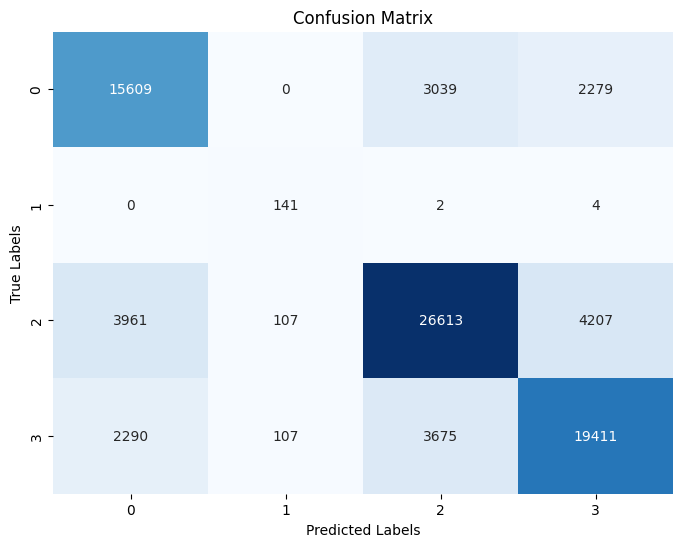

In [22]:
# plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Calculate and print other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.7584750445085641
F1 Score: 0.75910748153686
Precision: 0.7607191702838358


In [24]:
# Add classification report
original_labels = encoder.inverse_transform([0, 1, 2,3])

report = classification_report(y_test, y_pred, target_names=original_labels)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      Center       0.71      0.75      0.73     20927
 Independent       0.40      0.96      0.56       147
        Left       0.80      0.76      0.78     34888
       Right       0.75      0.76      0.76     25483

    accuracy                           0.76     81445
   macro avg       0.66      0.81      0.71     81445
weighted avg       0.76      0.76      0.76     81445



# **Test**

In [25]:
df_test= pd.read_excel('Data/test_data.xlsx')
df_test.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                       NaN   
3   3                       NaN   
4   4  UNGA ChildrenNotSoldiers   

                                           full_text in_reply_to_screen_name  \
0  b'RT @eu_eeas: "Let me tell you that a big par...                     NaN   
1  b'RT @stateofgreendk: "Although the #COVID19 p...                     NaN   
2  b'@hjorvarhaflida // jebb - i\xc3\xb0a\xc3\xb0...          hjorvarhaflida   
3  b'I ett l\xc3\xa4ge med pandemi, klimat, trans...                     NaN   
4  b'RT @BelgiumMFA: \xf0\x9f\x93\x8d #UNGA\n\n\x...                     NaN   

  country_user gender_user  pol_spec_user  
0      belgium        Male            NaN  
1      denmark        Male            NaN  
2      iceland      Female            NaN  
3       sweden      Female            NaN  
4      belgium        Male            NaN

In [26]:
df_test['TextClean'] = df_test['full_text'].apply(preprocess)
df_test['TextClean'] = df_test['TextClean'].apply(lemmatizer)

In [27]:
df_test['hashtags'].fillna('', inplace=True)
df_test['in_reply_to_screen_name'].fillna('', inplace=True)
df_test['TextHashtag'] = df_test['TextClean'] + ' ' + 3 * df_test['hashtags'] + ' ' + df_test['country_user'] + ' ' + df_test['gender_user'] + ' ' + df_test['in_reply_to_screen_name'].astype(str)
df_test['TextHashtag'] = df_test['TextHashtag'].str.lstrip('b')
df_test.head()

Id                  hashtags  \
0   0                  EUAfrica   
1   1                   COVID19   
2   2                             
3   3                             
4   4  UNGA ChildrenNotSoldiers   

                                           full_text in_reply_to_screen_name  \
0  b'RT @eu_eeas: "Let me tell you that a big par...                           
1  b'RT @stateofgreendk: "Although the #COVID19 p...                           
2  b'@hjorvarhaflida // jebb - i\xc3\xb0a\xc3\xb0...          hjorvarhaflida   
3  b'I ett l\xc3\xa4ge med pandemi, klimat, trans...                           
4  b'RT @BelgiumMFA: \xf0\x9f\x93\x8d #UNGA\n\n\x...                           

  country_user gender_user  pol_spec_user  \
0      belgium        Male            NaN   
1      denmark        Male            NaN   
2      iceland      Female            NaN   
3       sweden      Female            NaN   
4      belgium        Male            NaN   

                                           TextClean  \
0  eeas let tell big part world future also prese...   
1  stateofgreendk although covid19 pandemic overs...   
2                            hjorvarhaflida jebb bei   
3  pandemi klimat transport vital teknik ekonomi ...   
4  belgiummfa unga every child deserve safe child...   

                                         TextHashtag  
0  eeas let tell big part world future also prese...  
1  stateofgreendk although covid19 pandemic overs...  
2  hjorvarhaflida jebb bei  iceland Female hjorva...  
3  pandemi klimat transport vital teknik ekonomi ...  
4  elgiummfa unga every child deserve safe childh...

In [28]:


X_tfidf_test = tfidf_vectorizer.transform(df_test['TextHashtag'])


X_count_test = count_vectorizer.transform(df_test['TextHashtag'])


X_tv_test = hstack((X_tfidf_test, X_count_test))

In [29]:
Y_predict = lr.predict(X_tv_test)

# **Submission**

In [30]:
Id = range(0,len(Y_predict))

dict = {'Id': Id, 'pol_spec_user': Y_predict}

df = pd.DataFrame(dict)

def fun_c(x):
    if x == 1:
        return 'Independent'
    if x == 2:
        return 'Left'
    if x == 3:
        return 'Right'
    else:
        return 'Center'
df['pol_spec_user']=df['pol_spec_user'].apply(lambda x: fun_c(x))
df.head()


Id pol_spec_user
0   0          Left
1   1          Left
2   2          Left
3   3          Left
4   4         Right

In [31]:
df.to_csv('final_submission.csv', index=False)